<h1><center>
 Estimación de niveles de  obesidad basados en habitos alimenticios y  condición fisica
</center></h1>

## Introducción

<p style='text-align: justify;'>

La obesidad es un trastorno nutricional cuya incidencia ha venido aumentado,
especialmente en los Estados Unidos y Europa. El origen de este incremento está
en los cambios nutricionales, atributos de acondicionamiento fisico y económicos que experimentan las sociedades.
El incremento de la prevalencia de la obesidad, tiene implicaciones significativas sobre las políticas de salud
pública porque los tratamientos de sus comorbilidades —las enfermedades que
acompañan al desorden original o primario— suelen ser costosos y duraderos en el tiempo [(Palechor, F. M., & de la Hoz Manotas, A., 2019)](https://www.sciencedirect.com/science/article/pii/S2352340919306985).
    
[medlinePlus (2021)](https://medlineplus.gov/spanish/ency/patientinstructions/000348.htm) expone que la obesidad es una enfermedad grave y crónica; la cual puede llevar a otros problemas de salud
incluyendo diabetes, enfermedad cardíaca y algunos cánceres. Por ende, las personas con obesidad tienen una mayor probabilidad de sufrir estos problemas de salud:
 
 * Glucosa (azúcar) alta en la sangre o diabetes.
 * Presión arterial alta (hipertensión).
 * Nivel alto de colesterol y triglicéridos en la sangre (dislipidemia o alto nivel de grasas en la sangre).
 * Ataques cardíacos debido a enfermedad cardíaca coronaria, insuficiencia cardíaca y accidente cerebrovascular.
 * Problemas óseos y articulares. Más peso ejerce presión sobre los huesos y articulaciones. Esto puede llevar a osteoartritis,    una enfermedad que causa rigidez y dolor articular.
 * Apnea del sueño o pausas en la respiración durante el sueño. Esto puede causar fatiga o somnolencia diurna, poca atención y    problemas en el trabajo.
 * Cálculos biliares y problemas del hígado.
 * Algunos tipos de cáncer.  

Para el caso de Colombia, en 2015, el 56,4%  de los
adultos tenía sobrepeso, y el 18,7% era obeso [(Instituto Colombiano de Bienestar
Familiar, 2015)](https://www.icbf.gov.co/bienestar/nutricion/encuesta-nacional-situacion-nutricional#ensin3). Según el icbf (2010, p. 9): *«Uno de cada tres colombianos presenta
exceso de peso… Las cifras de exceso de peso aumentaron en los últimos cinco
años en 5.2 puntos porcentuales con respecto al 2010…»*    
   
Apartir en las problematicas de salud pubica, la predicción temprana del riesgo de enfermedad y la medicina personalizada tienen un gran potencial en el futuro de la atención médica, ya que las soluciones de inteligencia artificial (IA) y machine learning (ML) están transformando la forma en que se brinda cuidado de la salud. Las organizaciones de  salud pueden usar algoritmos  para mejorar la toma de  decisiones tanto a nivel clinico como comercial,  asi podiendo mejorar la calidad de  las experiencias que brinda.
    
Es asi que, en este trabajo se presenta datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimentarios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NObesidad (Nivel de Obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I , Obesidad Tipo II y Obesidad Tipo III.
</p>

#### hábitos alimenticios:

- `FAVC => Consumo frecuente de alimentos de alto contenido calórico'
- `FCVC => Frecuencia de consumo de verduras`
- `NCP => Número de comidas principales`
- `CAEC => Consumo de alimentos entre horas`
- `CH20 => Consumo de agua diario`
- `CALC => Consumo de alcohol`

#### atributo físico:

- `SCC => Seguimiento del consumo de calorías`
- `FAF => Frecuencia de actividad física`
- `TUE => Tiempo usando dispositivos tecnológicos`
- `MTRANS => Transporte utilizado`

#### otro atributo:

- `GÉNERO`
- `AÑOS`
- `ALTURA`
- `PESO`


### Prerequisitos

Para este  notebook se necesita installar las  siguientes  dependencias:

- `os`
- `python == 3.9.7`
- `numpy == 1.23.1`
- `scipy == 1.9.0`
- `matplotlib == 3.5.2`
- `scikit-learn == 1.1.2`
- `joblib == 1.1.0`
- `h5py == 2.7.0`
- `Pillow == 9.2.0`
- `pandas == 1.4.3`
- `TensorFlow == 2.9.1`
- `Keras == 2.9.0`
- `factor-analyzer == 0.4.0`
- `ppscore == 1.2.0` == 0.11.2
- `seaborn == 0.11.2`

In [2]:
# se instala e importa las ribrerias(modulos) necesarios para  el analisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import plotly 
import plotly.express as px



In [3]:
# cargar  archivo de test para  chequear  el comportamiento de los modelos  ajustados( regresion y clasificacion binariacd Desktop)
data = pd.read_csv("Data/ObesityDataSet_raw_and_data_sinthetic.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

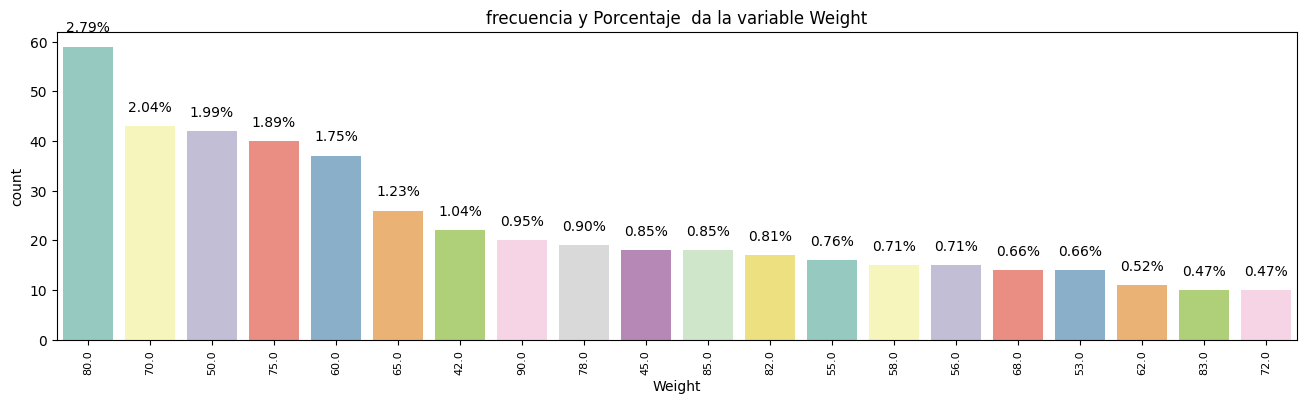

In [5]:
#Codes from Gabriel Preda

def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(x = df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("frecuencia y Porcentaje  da la variable {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
plot_count("Weight", "Weight",data,4)

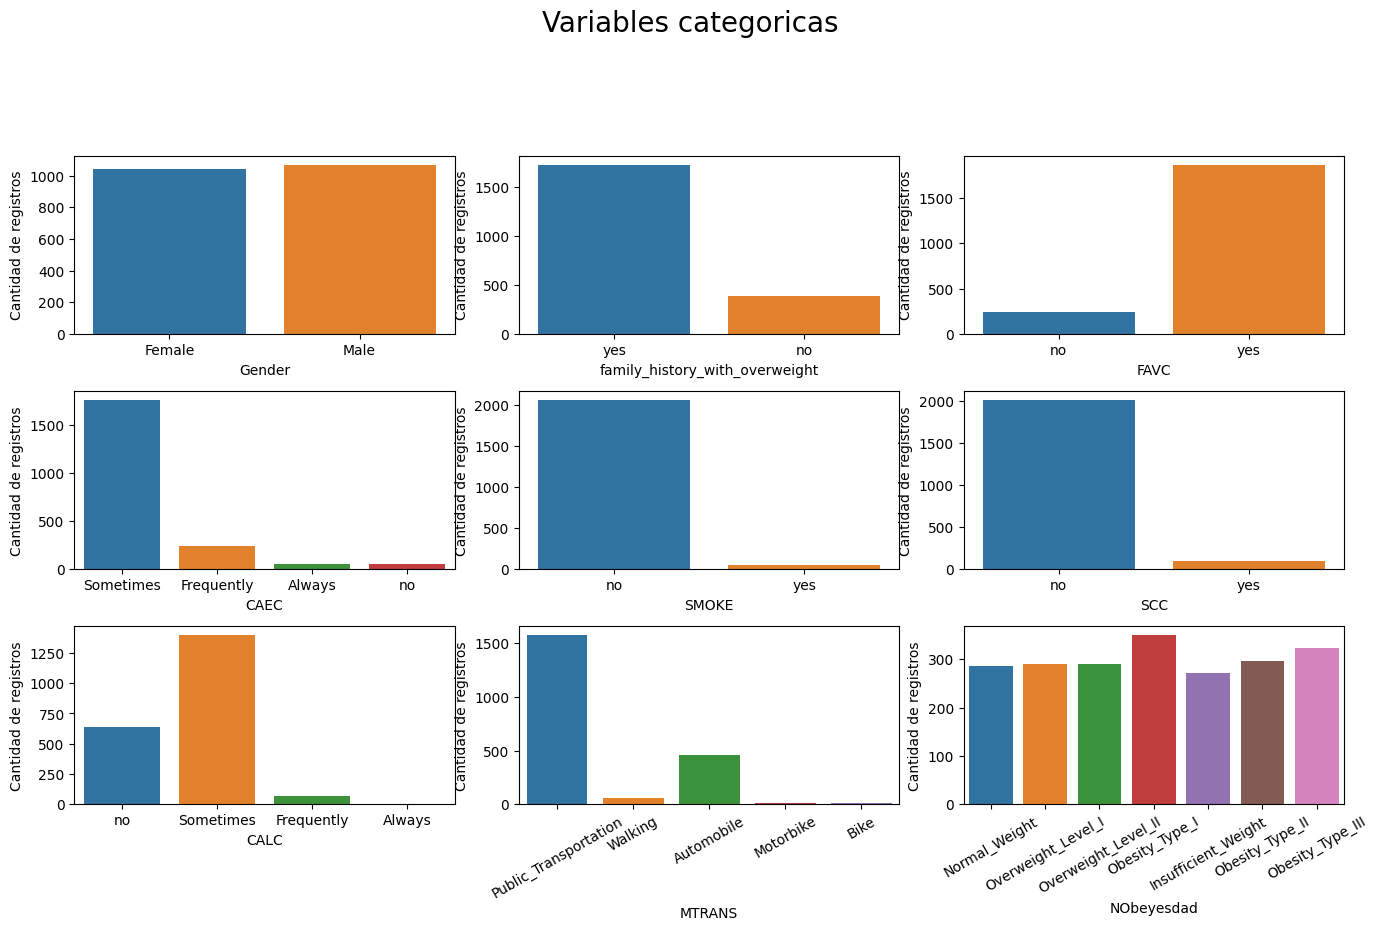

In [6]:
# colunas  de  interes
columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
           'SCC', 'CALC', 'MTRANS','NObeyesdad']

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(x = data[col], ax=subplot)
    
    if col=="MTRANS":
        sns.countplot(x = data[col],ax=subplot)
        subplot.set_xticklabels(subplot.get_xticklabels(),rotation = 30, size = 10)
        subplot.yaxis.label.set_text("Cantidad de registros")
        
    elif col=="NObeyesdad":
        sns.countplot(x = data[col],ax=subplot)
        subplot.set_xticklabels(subplot.get_xticklabels(),rotation = 30, size = 10)
        subplot.yaxis.label.set_text("Cantidad de registros")
    else:
        sns.countplot(x = data[col],ax=subplot)  
        subplot.yaxis.label.set_text("Cantidad de registros")
        
# mustrar  figura y plots
fig.suptitle("Variables categoricas", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.0, h_pad=1)
plt.show()


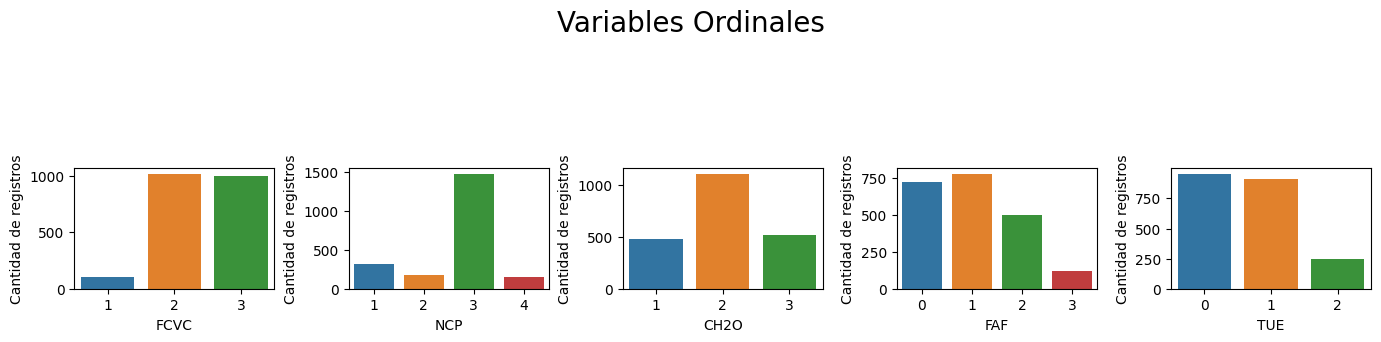

In [7]:

# columnas  de  interes
columns = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]
data.Age = data["Age"].astype(int)
fig, ax = plt.subplots(1, 5, figsize=(15, 4))
for col, subplot in zip(columns, ax.flatten()):
    data[col] = round(data[col]).astype('int')
    #sns.countplot(x = round(data[col]).astype(int), ax=subplot)
    sns.countplot(x = data[col], ax=subplot)
    subplot.yaxis.label.set_text("Cantidad de registros")

# show figure & plots
fig.suptitle("Variables Ordinales", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.7, h_pad=0.5)
plt.show()

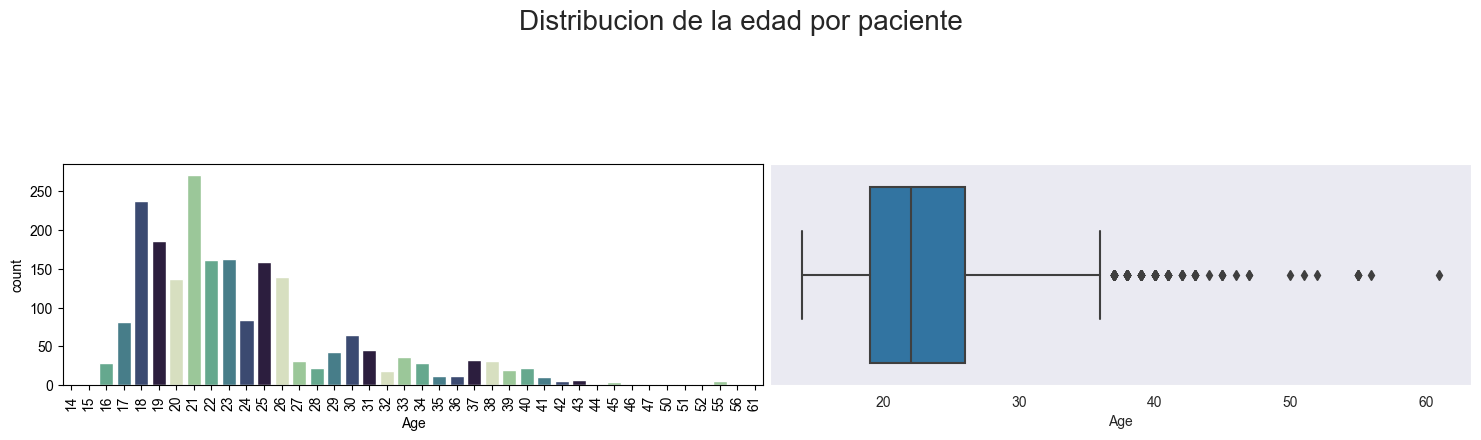

In [8]:
#barplot
fig = plt.figure(figsize = (16,5))

ax1 = fig.add_subplot(121)
sns.set_style("dark")
sns.countplot(x="Age", data=data, 
              palette=sns.cubehelix_palette(start=.5, rot=-.75,), 
              saturation=1)
plt.xticks( size=10, rotation=90)
#boxplot
ax1 = ax1 = fig.add_subplot(122)
sns.boxplot(x = data.Age)

# show figure & plots
fig.suptitle("Distribucion de la edad por paciente", fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=.1)
plt.show()

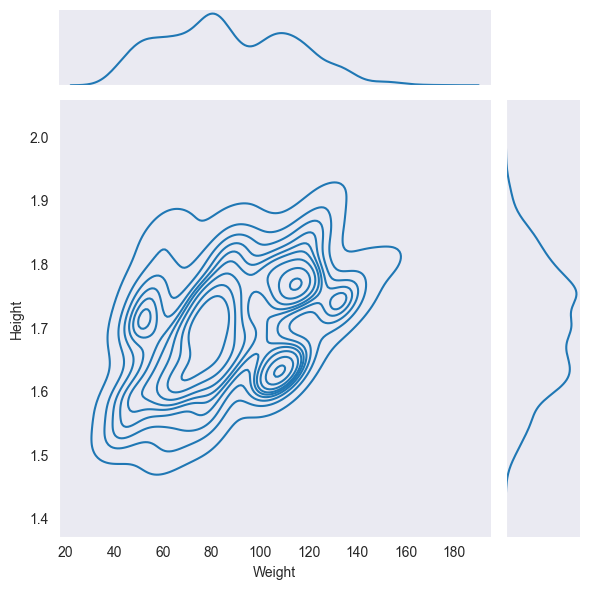

In [10]:
sns.jointplot(x='Weight', y='Height', data=data, kind='kde')

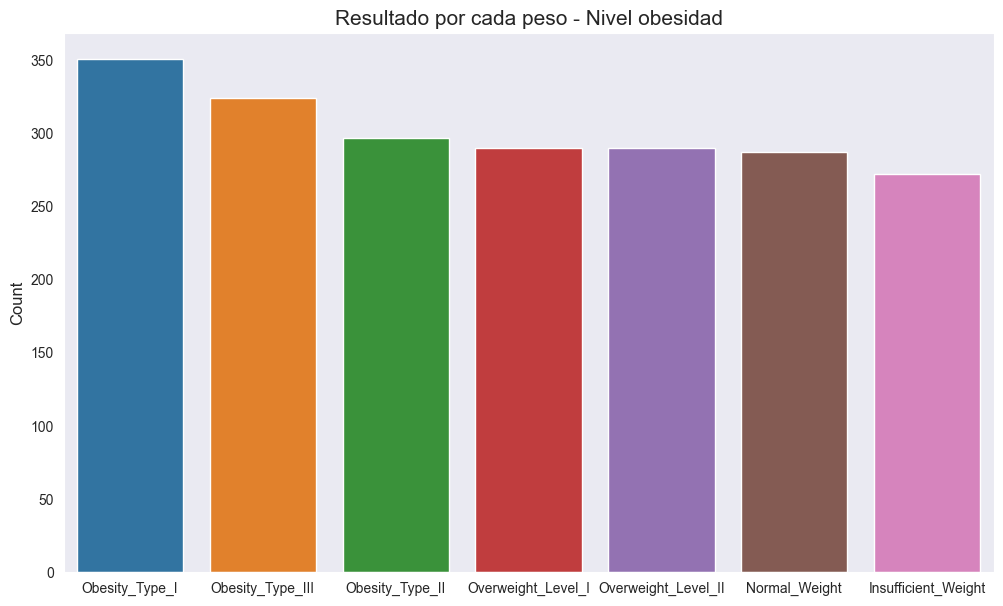

In [9]:
name = data['NObeyesdad'].value_counts().index
num = data['NObeyesdad'].value_counts().values

fig = px.pie(data_frame=data,names=name,values=num
             ,title='Grafico de  pie sobre  los resultados de niveles de obesidad',width=800,height=600)
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

plt.figure(figsize=(12,7))
sns.countplot(x='NObeyesdad',data=data, order = data.NObeyesdad.value_counts().index)
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Resultado por cada peso - Nivel obesidad',fontsize=15)
plt.show()

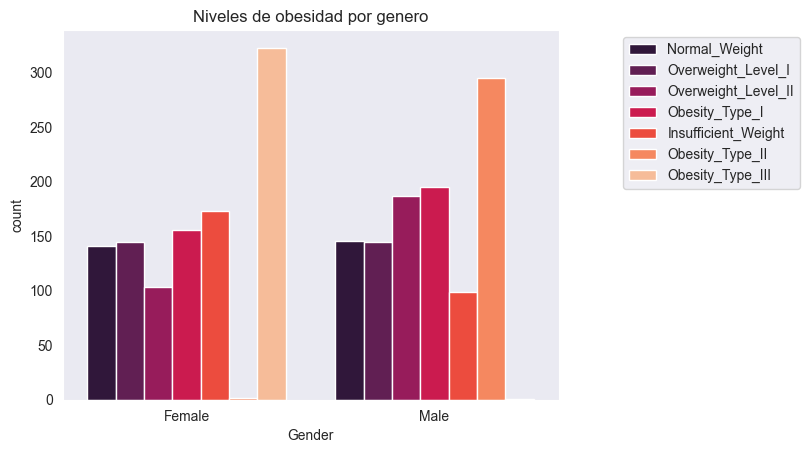

In [9]:
sns.set_style("dark")
sns.countplot(x="Gender", data=data, palette= "rocket", #sns.dark_palette("#88d", 8), 
              saturation=10, hue="NObeyesdad").set(title='Niveles de obesidad por genero')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.))
plt.show()

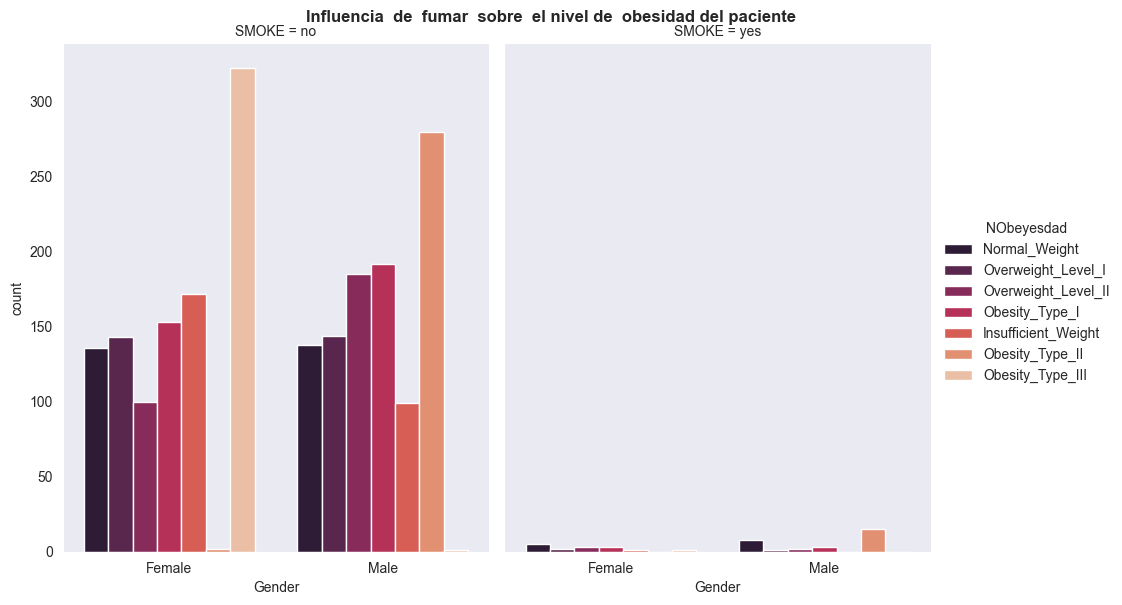

In [10]:
# influencia  de  fumar  sobre  el nivel de  obesidad del paciente
sns.catplot(x='Gender', hue='NObeyesdad', col='SMOKE',
                data=data, kind="count",
                height=6, aspect=.8,
                palette="rocket")
plt.suptitle ('Influencia  de  fumar  sobre  el nivel de  obesidad del paciente',fontweight ="bold", verticalalignment = 'baseline')

plt.show()

[Text(0.5, 1.0, 'Historial familiar sobre  obesidad ~ Genero')]

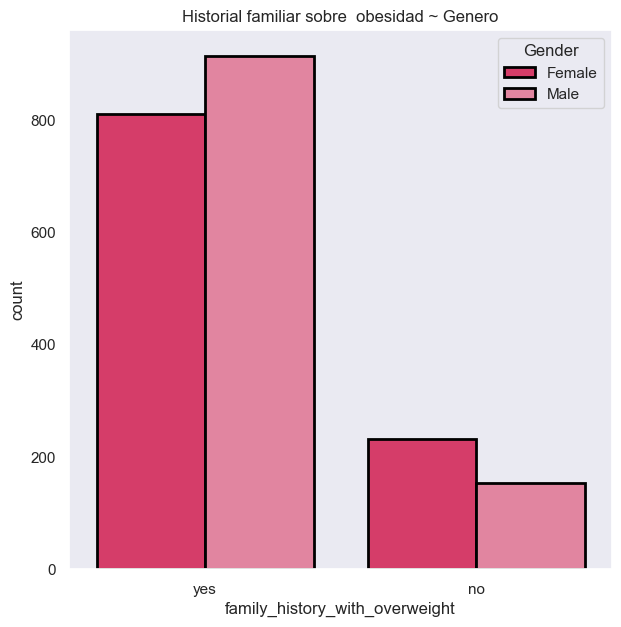

In [11]:
#Historial de  obesidad  familiar  por  genero de  paciente
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(7, 7),
            'xtick.labelsize':10,
            'ytick.labelsize':8})


sns.set(style="white",font_scale=1)

sns.set_style("dark")
sns.countplot(x="family_history_with_overweight", data=data, palette=sns.diverging_palette(360, 10), 
              saturation=10, edgecolor=(0,0,0), linewidth=2, hue="Gender").set(title='Historial familiar sobre  obesidad ~ Genero')

In [13]:

def catplot_funtion(data_, x_, col_ , title_ , palette_):
    ''' realiza  grafica  para contrastar variables de  forma mas interactiva 
    data_ : dataframe que contiene la informacion necesaria  para  extraer los valores a graficar
    x_ : string que  identifica el nombre del campo a graficar en el eje x del plot
    col_ : string  con el nombre de la columna categorica que se utiliazra para determinarán el facetado de la cuadrícula
    title_ : string que asigna el nombre del grafico para el titulo
    palette_ : paleta de color  que  se utilizara para  pintar el plot
    '''
    p = sns.catplot(x = x_, hue="NObeyesdad", col = col_,
                data=data_, kind="count",
                height=6, aspect=.8,
                palette= palette_)
    p. fig . suptitle (title_,fontweight ="bold", verticalalignment = 'baseline')
    plt.show()

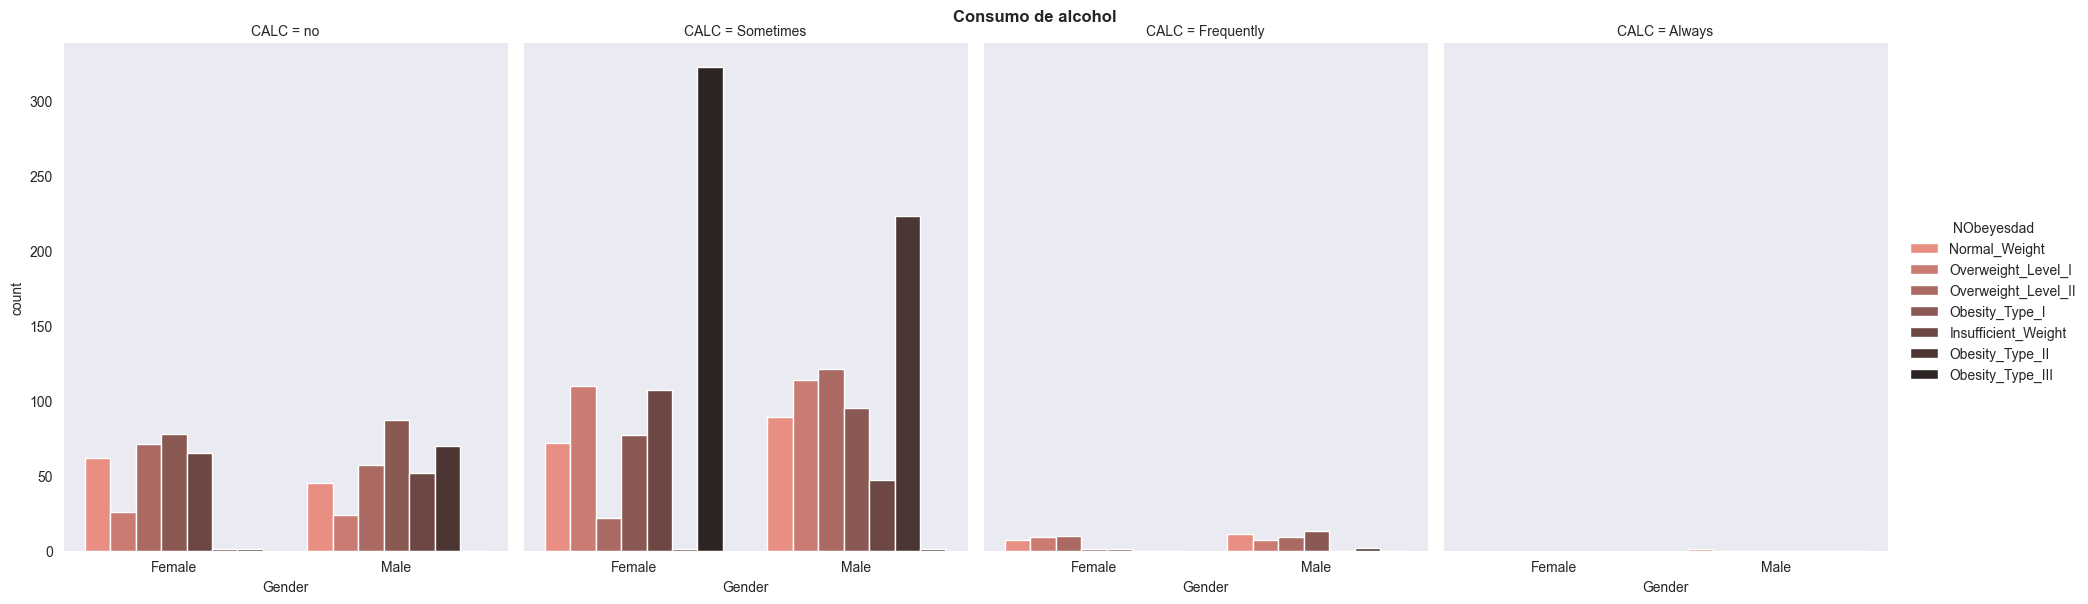

In [14]:
catplot_funtion(data_ = data, x_ = "Gender", col_ = "CALC", title_  = 'Consumo de alcohol ', palette_= "dark:salmon_r")

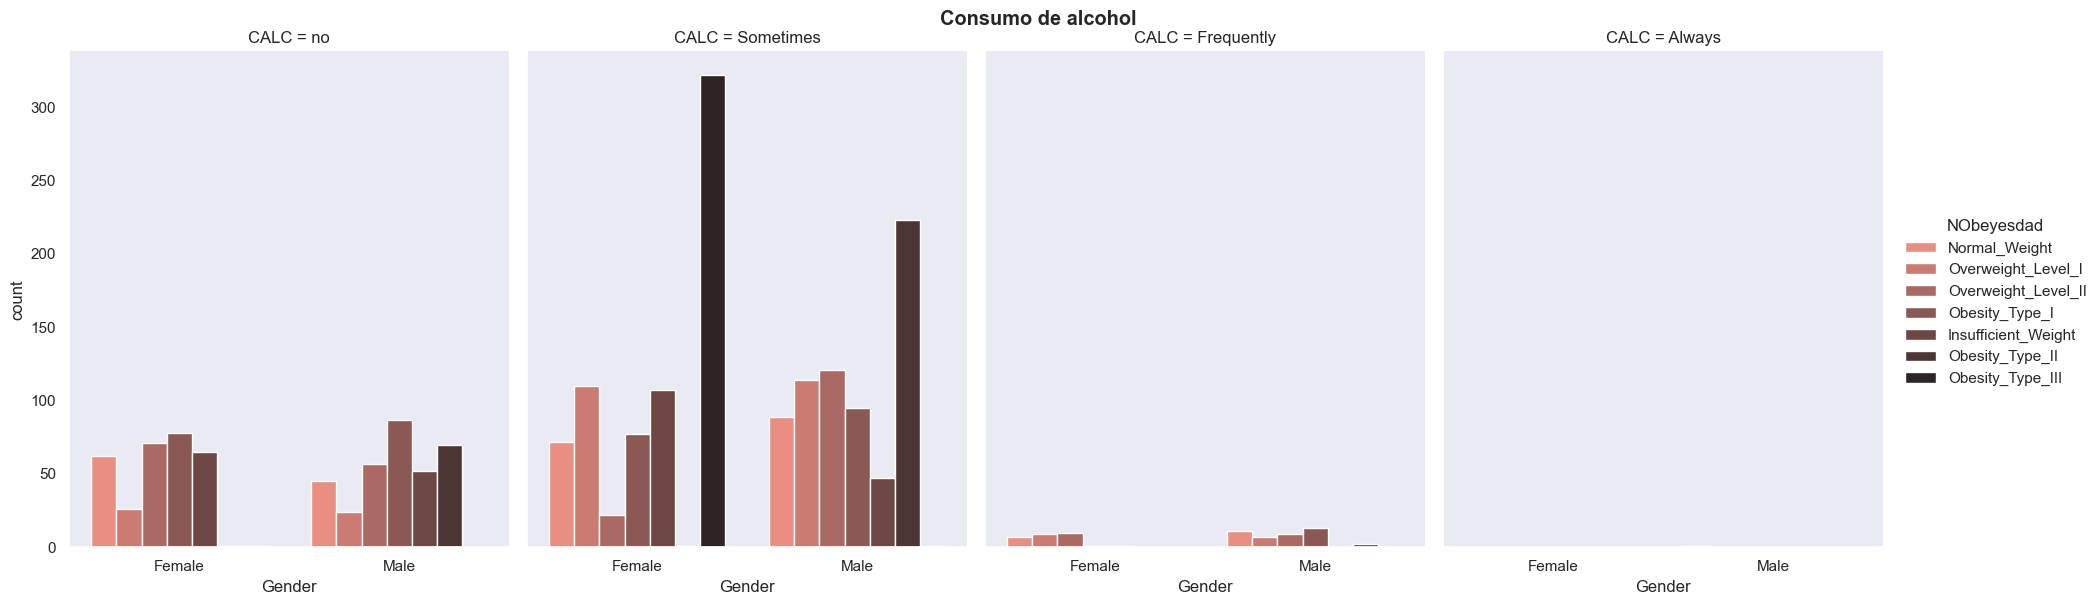

In [12]:
#Consumo de alcohol vs niveles de  obesidad por genero 


p = sns.catplot(x="Gender", hue="NObeyesdad", col="CALC",
                data=data, kind="count",
                height=6, aspect=.8,
                palette="dark:salmon_r")
p. fig . suptitle ('Consumo de alcohol ',fontweight ="bold", verticalalignment = 'baseline')
plt.show()


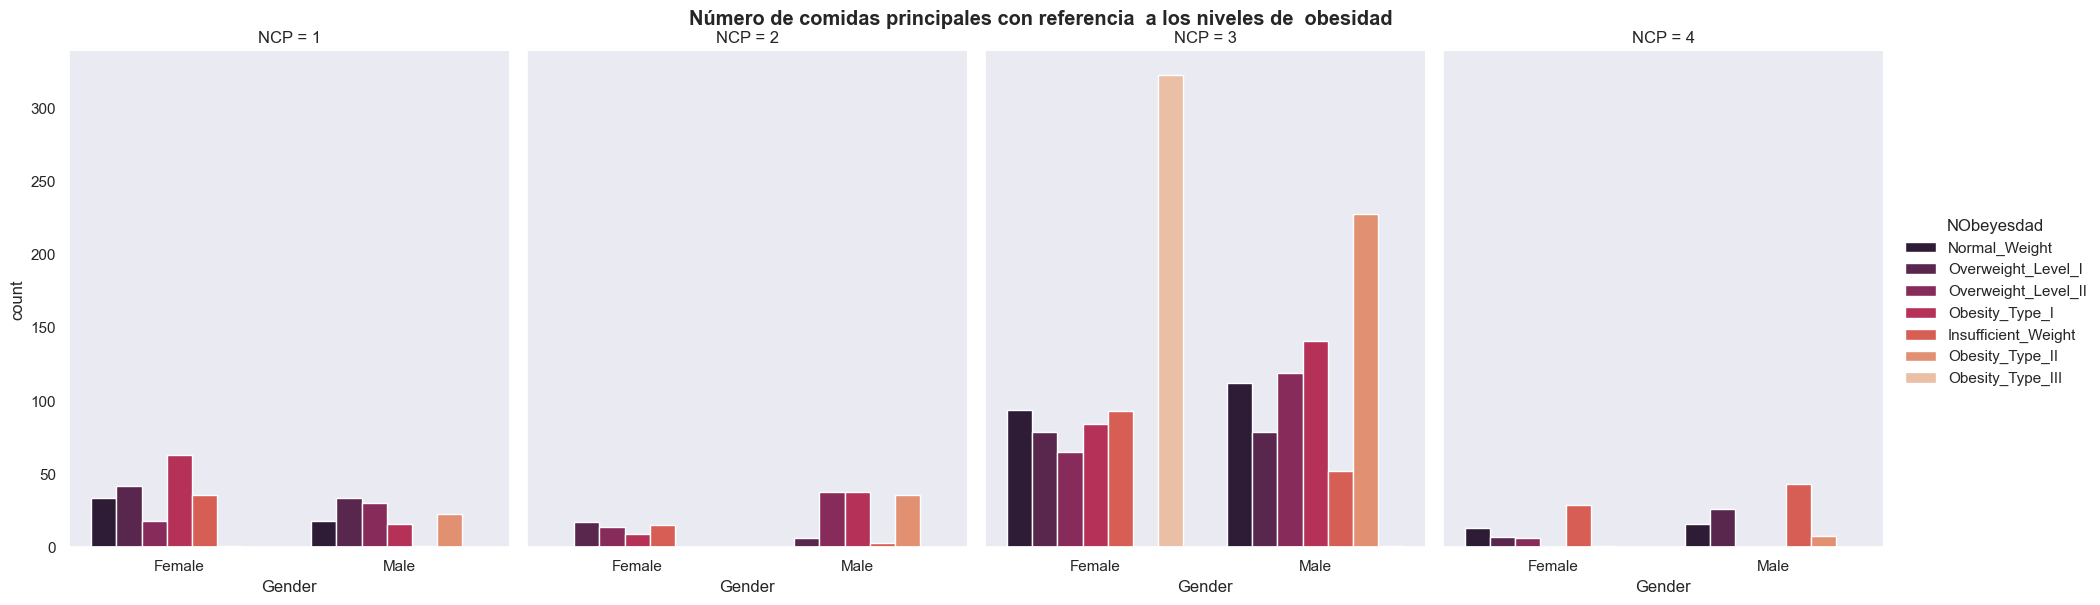

In [13]:
# Número de comidas principales con referencia  a los niveles de  obesidad
sns.catplot(x="Gender", hue="NObeyesdad", col="NCP",
                data=data, kind="count",
                height=6, aspect=.8,
                palette="rocket")

plt.suptitle ('Número de comidas principales con referencia  a los niveles de  obesidad',fontweight ="bold", verticalalignment = 'baseline')
plt.show()

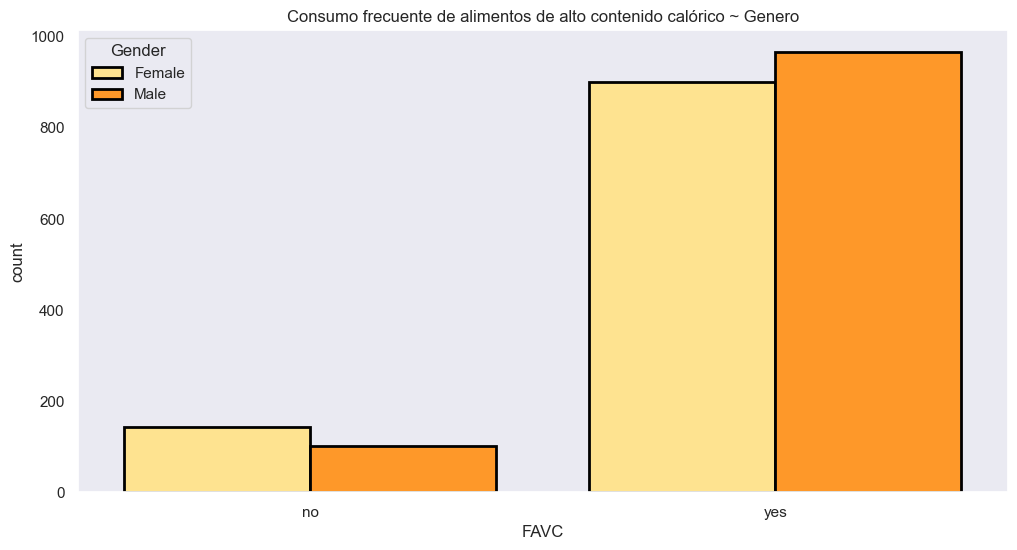

In [14]:
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(12, 6),
            'xtick.labelsize':25,
            'ytick.labelsize':20})


sns.set(style="white",font_scale=1)

sns.set_style("dark")
sns.countplot(x="FAVC", data=data, palette=sns.color_palette("YlOrBr", 3), 
              saturation=10, edgecolor=(0,0,0), linewidth=2, hue="Gender").set(title='Consumo frecuente de alimentos de alto contenido calórico ~ Genero')
plt.show()

In [15]:
# Contrate  de  niveles  de obesidad  contra cantidad de veces que se hace actividad fisica
pd.crosstab([data.Gender, data.NObeyesdad],data.FAF, margins=True)


FAF                           0    1    2    3   All
Gender NObeyesdad                                   
Female Insufficient_Weight   59   45   64    5   173
       Normal_Weight         46   50   30   15   141
       Obesity_Type_I        83   44   27    2   156
       Obesity_Type_II        1    0    1    0     2
       Obesity_Type_III     187   68   68    0   323
       Overweight_Level_I    58   57   17   13   145
       Overweight_Level_II   41   41   19    2   103
Male   Insufficient_Weight   13   27   53    6    99
       Normal_Weight         34   47   39   26   146
       Obesity_Type_I        48   79   45   23   195
       Obesity_Type_II       68  165   62    0   295
       Obesity_Type_III       0    0    1    0     1
       Overweight_Level_I    26   69   39   11   145
       Overweight_Level_II   56   84   31   16   187
All                         720  776  496  119  2111

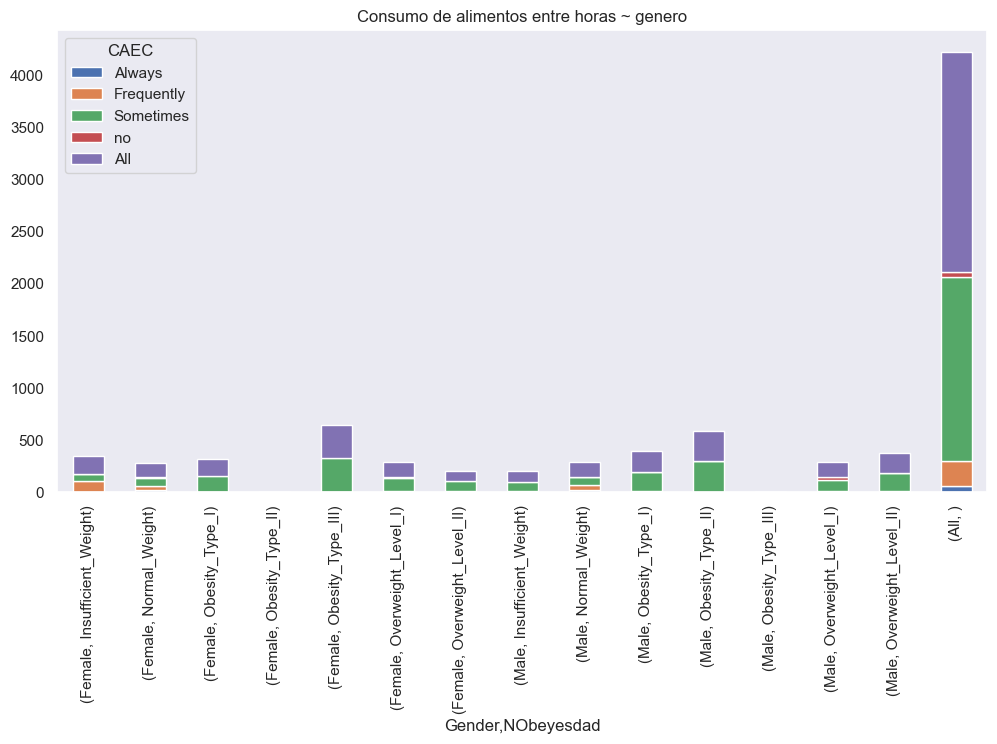

In [16]:
# Contrate  de  niveles  de obesidad  contra consumo de  alimentos intermedios a las comida principal del dia
pd.crosstab([data.Gender, data.NObeyesdad],data.CAEC, margins=True).plot.bar(stacked=True)
plt.title("Consumo de alimentos entre horas ~ genero")
plt.show()

tabla_crusada = (pd.crosstab([data.Gender, data.NObeyesdad],data.CAEC, margins=True)/2111)*100
tabla_crusada.style.background_gradient(cmap='coolwarm')    

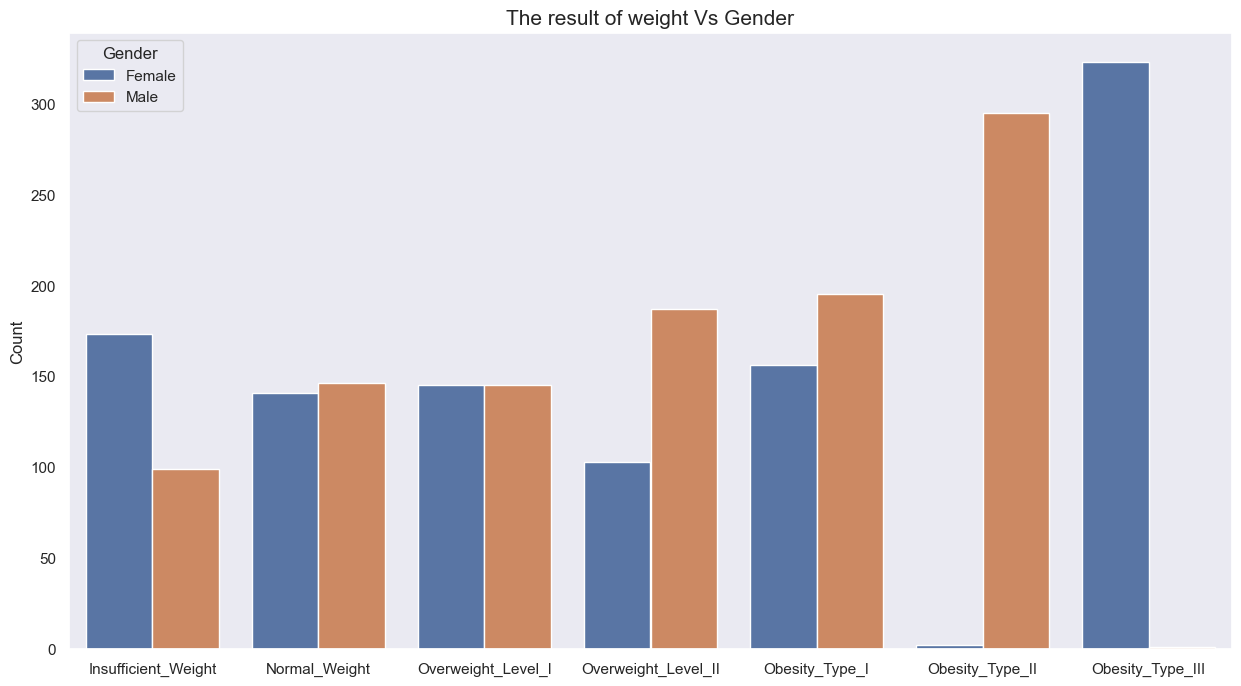

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='NObeyesdad',data=data,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I',
'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.xlabel(None)
plt.title('The result of weight Vs Gender',fontsize=15)
plt.show()

<AxesSubplot:>

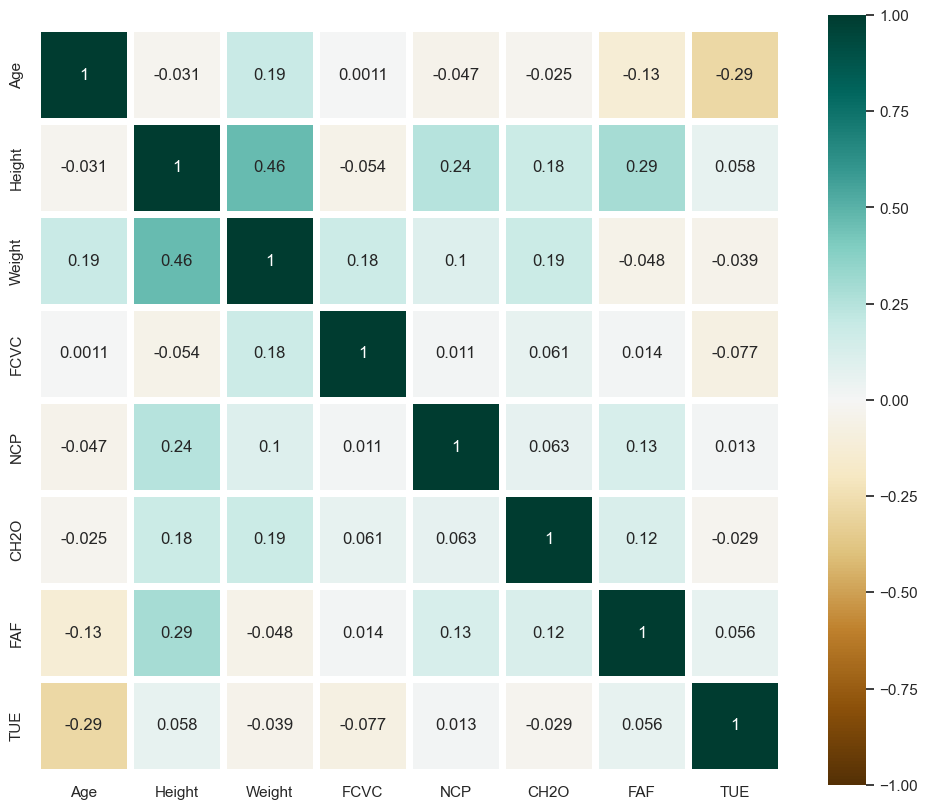

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,
            cmap='BrBG',linewidths=5)

In [19]:
# procesamiento de  datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#Modelos
from sklearn.tree import DecisionTreeClassifier


# resultados
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [20]:
# preparacion de  la data 

data_ = data.copy()

feature = data_.drop('NObeyesdad',axis=1)
answer = data_['NObeyesdad'].values.reshape(-1)

In [21]:
#outlier detection & handling (filling with mean)
cont_feature_col=["FCVC", "NCP", "CH2O", "FAF", "TUE", "Height", "Weight", "Age"]

cont_df = data_[cont_feature_col]

# find the IQR
q1 = data_[cont_feature_col].quantile(.25)
q3 = data_[cont_feature_col].quantile(.75)
IQR = q3-q1

outliers_df = np.logical_or((data_[cont_feature_col] < (q1 - 1.5 * IQR)), (data_[cont_feature_col] > (q3 + 1.5 * IQR))) 

outlier_list=[]
total_outlier=[]
for col in list(outliers_df.columns):
    try:
        total_outlier.append(outliers_df[col].value_counts()[True])
        outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
outlier_list

outlier_df=pd.DataFrame(zip(list(outliers_df.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_df.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_df

total  outlier(%)
name of the column                   
FCVC                    0    0.000000
NCP                   641   30.364756
CH2O                 1001   47.418285
FAF                     0    0.000000
TUE                     0    0.000000
Height                  1    0.047371
Weight                  1    0.047371
Age                   147    6.963524

In [22]:
#division de  la data para  el entrenamiento y prueba de  modelo
xtrain,xtest,ytrain,ytest = train_test_split(feature,answer,test_size=0.3,random_state=42)

In [23]:
# coficicacion de  variables objetivo multiclass ( niveles de obesidad) en el conjunto de  datos para train
le = LabelEncoder()
y_train = le.fit_transform(ytrain)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [24]:
# coficicacion de  variables objetivo multiclass ( niveles de obesidad) en el conjunto de  datos paratest
le = LabelEncoder()
y_test = le.fit_transform(ytest)


In [25]:
etiquetas = pd.DataFrame([[key, le_name_mapping[key]] for key in le_name_mapping.keys()], columns=['id_nivel_obesidad', 'nivel_obesidad'])
etiquetas


id_nivel_obesidad       nivel_obesidad
0                  0  Insufficient_Weight
1                  1        Normal_Weight
2                  2       Obesity_Type_I
3                  3      Obesity_Type_II
4                  4     Obesity_Type_III
5                  5   Overweight_Level_I
6                  6  Overweight_Level_II

In [26]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [27]:
### escalar variables continuas 
Scale_features = ['Age', 'Height', 'Weight']

Scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaling', StandardScaler())
])
### encoder para variables categoricas ordinales
Ordi_features = ['CAEC', 'CALC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])
### encoder para variables categoricas no ordinales
NonO_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder())
])

Preprocessor = ColumnTransformer(transformers=[
    ('Scale', Scale_transformer, Scale_features),
    ('Ordinal', Ordi_transformer, Ordi_features),
    ('Non-Ordinal', NonO_transformer, NonO_features)
], remainder = 'passthrough')
    
clf = Pipeline(steps=[('preprocessor', Preprocessor)])
clf.fit(xtrain, ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
 

In [28]:
trainX_df = clf.fit_transform(xtrain)
print(trainX_df.shape)

(1477, 25)


In [29]:
# Column names of Encoder step in pipeline

ohe_cols = clf.named_steps['preprocessor'].transformers_[2][1]\
    .named_steps['Non-O'].get_feature_names(NonO_features)
ohe_cols = [x for x in ohe_cols]


cols = [y for x in [Scale_features, Ordi_features, ohe_cols] for y in x]
cols

['Age',
 'Height',
 'Weight',
 'CAEC',
 'CALC',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'Gender_Female',
 'Gender_Male',
 'family_history_with_overweight_no',
 'family_history_with_overweight_yes',
 'FAVC_no',
 'FAVC_yes',
 'SMOKE_no',
 'SMOKE_yes',
 'SCC_no',
 'SCC_yes',
 'MTRANS_Automobile',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking']

In [30]:
transformed_x_train = pd.DataFrame(trainX_df, columns= cols)
transformed_x_train.head()

Age    Height    Weight  CAEC  CALC  FCVC  NCP  CH2O  FAF  TUE  ...  \
0  0.125073 -0.803003  0.719123   2.0   2.0   2.0  2.0   0.0  0.0  1.0  ...   
1  0.277243 -0.496412  0.969880   2.0   2.0   2.0  2.0   2.0  0.0  0.0  ...   
2 -0.940111  0.512332 -0.015543   2.0   2.0   2.0  2.0   2.0  1.0  0.0  ...   
3 -0.331434 -0.026553 -0.800929   0.0   2.0   2.0  2.0   1.0  2.0  1.0  ...   
4 -0.179265 -0.346817 -0.453961   2.0   2.0   1.0  2.0   1.0  0.0  2.0  ...   

   FAVC_yes  SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  MTRANS_Automobile  \
0       1.0       1.0        0.0     1.0      0.0                0.0   
1       1.0       1.0        0.0     1.0      0.0                0.0   
2       1.0       1.0        0.0     1.0      0.0                0.0   
3       0.0       1.0        0.0     0.0      1.0                0.0   
4       1.0       1.0        0.0     1.0      0.0                0.0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0          0.0               0.0                           1.0             0.0  
1          0.0               0.0                           1.0             0.0  
2          0.0               0.0                           1.0             0.0  
3          0.0               0.0                           1.0             0.0  
4          0.0               0.0                           1.0             0.0  

[5 rows x 25 columns]

In [31]:
#definicion de pipeline para procesamiento de  codificado y entreno previo de  4 modelos para clasificacion multiclases

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier()
    ]

top_class = []
top_score = []
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', Preprocessor),
                      ('classifier', classifier)])
    
    # training model
    pipe.fit(xtrain, ytrain)   
    print(classifier)
    
    acc_score = pipe.score(xtest, ytest)
    print("model score: %.3f" % acc_score)
    
    # using the model to predict
    y_pred = pipe.predict(xtest)
    
    target_names = [le_name_mapping[x] for x in le_name_mapping]
    print(classification_report(ytest, y_pred, target_names=target_names))
    
    if acc_score > 0.85:
        top_class.append(classifier)
        top_score.append(acc_score)
        
dict_params = dict(zip(top_class, top_score))  
        

DecisionTreeClassifier()
model score: 0.920
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.95      0.93        86
      Normal_Weight       0.85      0.82      0.84        93
     Obesity_Type_I       0.97      0.90      0.93       102
    Obesity_Type_II       0.93      0.98      0.96        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.86      0.85      0.86        88
Overweight_Level_II       0.90      0.95      0.93        79

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634

RandomForestClassifier()
model score: 0.929
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94        86
      Normal_Weight       0.82      0.85      0.84        93
     Obesity_Type_I       0.99      0.95      0.97    

In [32]:
# mejor modelo ajustado
topModels =  pd.DataFrame([[str(key)[:-2],dict_params[key] ] for key in dict_params.keys() ] , columns=['Model', 'acc_score'])
model  = topModels[topModels.acc_score ==  topModels.acc_score.max() ]


In [49]:
# transformacion del conjunto de test, se decodifican las variables ordinales, no ordinales y se escalan las continuas
testX_df = clf.fit_transform(xtest)

# nombre  de  las columnas  extraido del paso de encoder del pipeline
transformed_x_test = pd.DataFrame(testX_df, columns= cols)
transformed_x_test.head()

Age    Height    Weight  CAEC  CALC  FCVC  NCP  CH2O  FAF  TUE  ...  \
0 -0.622307  0.597307 -1.213192   1.0   2.0   1.0  3.0   1.0  3.0  2.0  ...   
1  0.446431 -0.796684  0.929543   2.0   1.0   2.0  2.0   2.0  0.0  0.0  ...   
2 -0.978553  1.597596 -0.977609   2.0   1.0   2.0  3.0   1.0  2.0  0.0  ...   
3 -0.444184 -1.913235 -1.650657   1.0   1.0   2.0  0.0   0.0  0.0  0.0  ...   
4 -0.266061  0.533708 -0.454127   2.0   1.0   1.0  2.0   1.0  1.0  2.0  ...   

   FAVC_yes  SMOKE_no  SMOKE_yes  SCC_no  SCC_yes  MTRANS_Automobile  \
0       1.0       1.0        0.0     1.0      0.0                0.0   
1       1.0       1.0        0.0     1.0      0.0                0.0   
2       1.0       1.0        0.0     0.0      1.0                1.0   
3       1.0       1.0        0.0     1.0      0.0                0.0   
4       0.0       1.0        0.0     1.0      0.0                0.0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0          0.0               0.0                           1.0             0.0  
1          0.0               0.0                           1.0             0.0  
2          0.0               0.0                           0.0             0.0  
3          0.0               0.0                           1.0             0.0  
4          1.0               0.0                           0.0             0.0  

[5 rows x 25 columns]

In [34]:
### Parametros para tunning  por modelo

parameters = {
    ## GradientBoostingClassifier
    'GradientBoostingClassifier' : {
               "n_estimators" : [5,50,250,500],
               "max_depth":[1,3,5,7,9],
               "learning_rate":[0.01,0.1,1,10,100]
              },
    
    ## Decision Tree
    'DecisionTreeClassifier' : {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(1,50)),
              }   ,
    
    ## RandomForestClassifier
    'RandomForestClassifier' : {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
             }
   
}


###### tunning  de los modelos  con mas accurracy previo 
name = []
accuracy = []
mod = []
for i in range(0,3):
    modelo = eval(list(topModels.Model)[i] + '(random_state=42)')
    locals()["grid_" + str(i)] = GridSearchCV(  modelo , parameters[list(topModels.Model)[i]],cv=5)
    locals()["grid_" + str(i)].fit(transformed_x_train ,y_train)
    y_pred_ = locals()["grid_" + str(i)].predict(transformed_x_test)
    Accuracy_score_ =  accuracy_score(y_test,y_pred_)
    accuracy.append(Accuracy_score_)
    #mod.append(locals()["grid_" + str(i)])
    mod.append("grid_" + str(i))
    name.append(list(topModels.Model)[i])
    
    
score_final = pd.DataFrame((zip(name, accuracy)), columns = ['Name_model', 'Accuracy'])


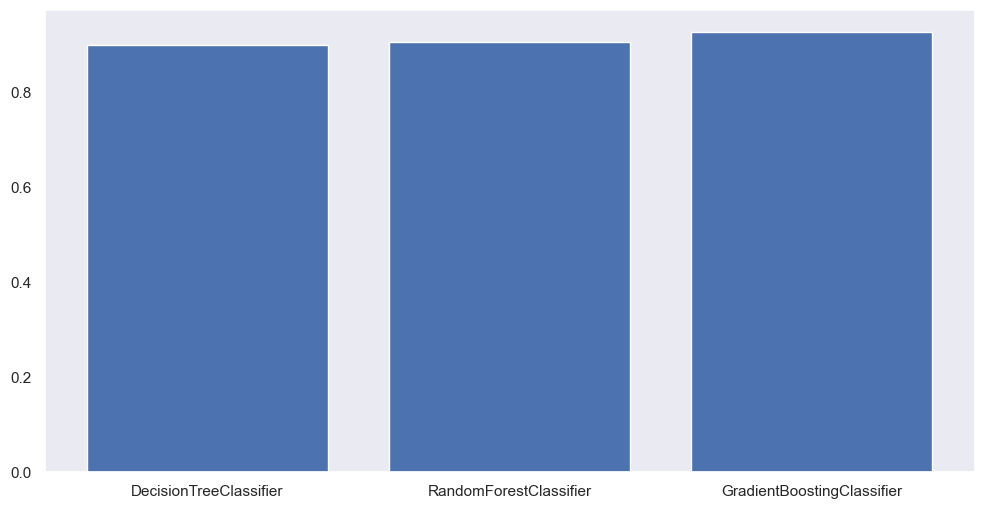

In [35]:

plt.bar(score_final .Name_model, score_final.Accuracy)
plt.show()

In [36]:
#Extraccion del modelo con mayor  accuracy 
index = accuracy.index(max(accuracy))
model =  eval(mod[index]) 

In [37]:
# guardar el mejor modelo entrenado
import pickle
filename = 'Modelo/finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [38]:
# cargar y chequear el modelo pre-entrenado con la data de  test 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(transformed_x_test, y_test)
result

0.9274447949526814

array([<AxesSubplot:title={'center':'None'}>], dtype=object)

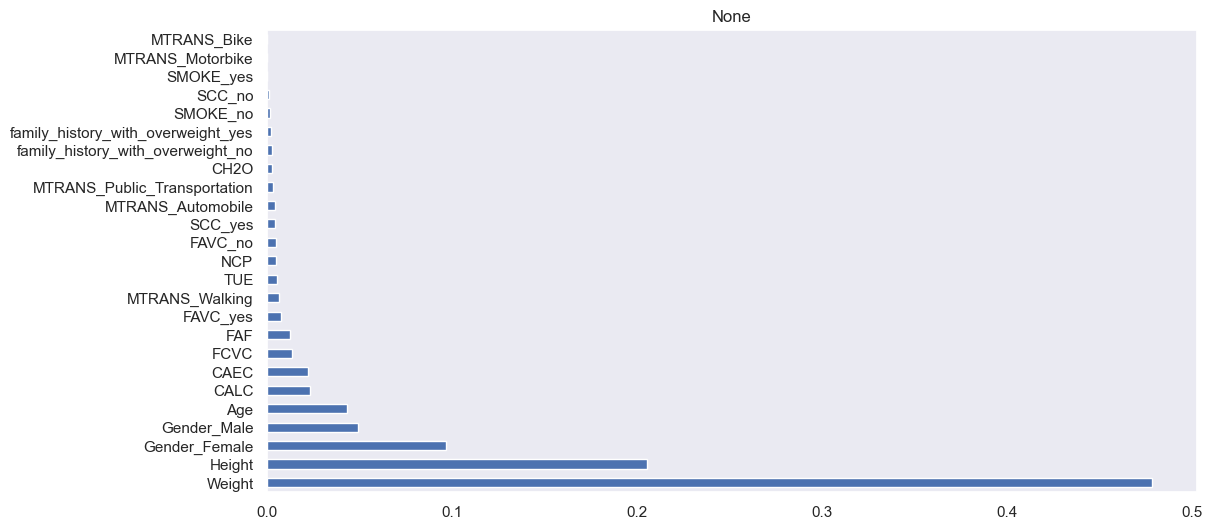

In [39]:
feacture_import = pd.Series(loaded_model.best_estimator_.feature_importances_, index = transformed_x_test.columns).nlargest(25)
feacture_import.plot.barh(rot=0, subplots=True)

In [40]:
### prueba  parametros 
params_GradientBoostingClassifier= {
    "n_estimators" : [5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
grid = GridSearchCV( eval(list(topModels.Model)[i] + '(random_state=42)'), params_GradientBoostingClassifier,cv=5)
grid.fit(transformed_x_train ,y_train  )
y_pred_ = grid.predict(transformed_x_test)


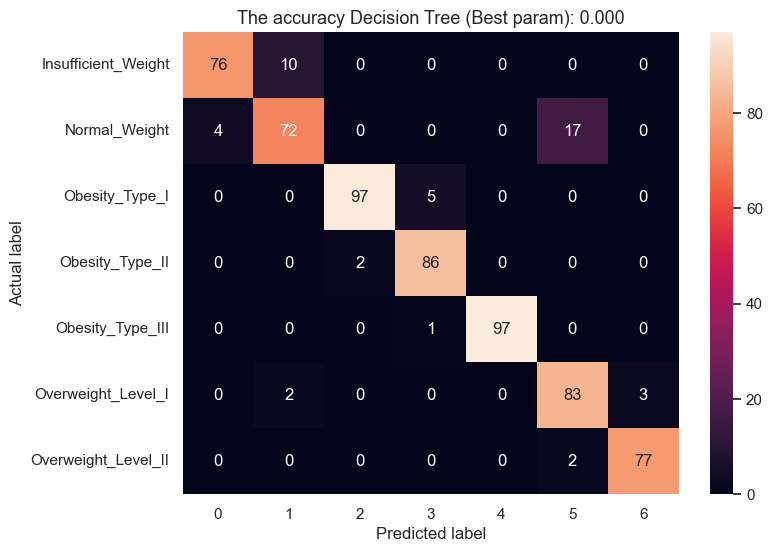

Accuracy score:  0.9274447949526814
Precision score:  0.9282784194046524
Recall:  0.9276898398431725
F1 score:  0.9267230174375294
ROC-AUC score 0.9930251618720347


In [41]:

### resultados  de  modelos  con gridsearch.predict
y_pred = grid.predict(transformed_x_test)
y_prob = grid.predict_proba(transformed_x_test)

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=mapping)

plt.figure(figsize=(8,6))                  
sns.heatmap(cm_df, annot=True)
plt.title('The accuracy Decision Tree (Best param): {0:.3f}'.format(accuracy_score(ytest,y_pred)),fontsize=13)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro"))

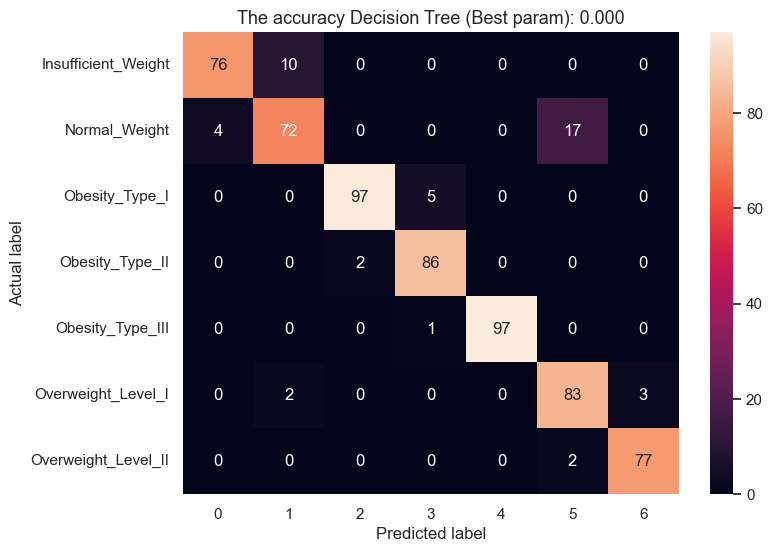

Accuracy score:  0.9274447949526814
Precision score:  0.9282784194046524
Recall:  0.9276898398431725
F1 score:  0.9267230174375294
ROC-AUC score 0.9930251618720347


In [42]:
## re-entreno con modelo gradientBoosting con grid.best_params_

gbc =eval(name[index] + '(random_state=42, **grid.best_params_ )')
gbc.fit (transformed_x_train ,y_train  )

y_pred = grid.predict(transformed_x_test)
y_prob = grid.predict_proba(transformed_x_test)

mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))

cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=mapping)

plt.figure(figsize=(8,6))                  
sns.heatmap(cm_df, annot=True)
plt.title('The accuracy Decision Tree (Best param): {0:.3f}'.format(accuracy_score(ytest,y_pred)),fontsize=13)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',)
plt.show()

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro"))

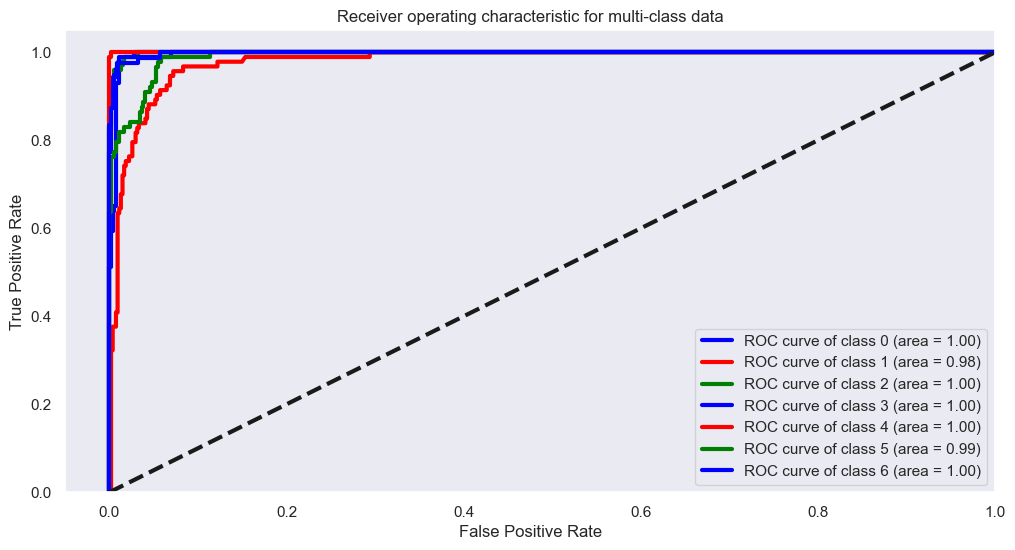

In [53]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import itertools as cly
# Binarize the output
y = label_binarize(y_test, classes=[0, 1, 2,3,4,5,6])
n_classes = y.shape[1]

y_score = grid.decision_function(transformed_x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cly.cycle(['blue', 'red', 'green', 'Purple','yellow' ,'orange','grey'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=3,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


In [54]:
# resultados  finales 
yhat = loaded_model.predict(transformed_x_test)
y_prob_hat = grid.predict_proba(transformed_x_test)



In [56]:
#probabilidad de  las clases en la clasificacion por cada paciente en la data de test ( bajo el mejor modelo entrenado)
pd.DataFrame(y_prob_hat,columns = etiquetas.nivel_obesidad  )

nivel_obesidad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
0                      1.000000e+00   1.520896e-18    4.315217e-21   
1                      1.293670e-28   1.882540e-28    6.589585e-27   
2                      9.999922e-01   7.840626e-06    6.608648e-13   
3                      1.000000e+00   1.283943e-19    1.589731e-22   
4                      2.564119e-11   9.992012e-01    3.509643e-11   
..                              ...            ...             ...   
629                    1.175896e-19   1.855043e-17    1.752292e-19   
630                    6.014395e-06   9.999940e-01    1.020433e-17   
631                    2.716794e-20   1.876710e-17    4.046274e-20   
632                    2.577598e-19   6.051918e-17    9.185714e-19   
633                    8.893307e-29   2.215895e-26    4.529478e-27   

nivel_obesidad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
0                  3.434952e-21      3.664212e-21        2.393605e-20   
1                  7.537081e-25      1.000000e+00        1.732411e-28   
2                  5.333264e-13      5.689225e-13        8.032469e-11   
3                  4.924642e-23      5.253280e-23        7.108398e-21   
4                  2.833471e-11      3.022513e-11        7.986874e-04   
..                          ...               ...                 ...   
629                1.297819e-19      1.384324e-19        1.000000e+00   
630                8.123629e-18      8.665833e-18        5.413537e-16   
631                2.996816e-20      3.196566e-20        1.000000e+00   
632                2.844621e-19      3.034359e-19        9.999547e-01   
633                1.000000e+00      1.047230e-28        7.908532e-28   

nivel_obesidad  Overweight_Level_II  
0                      9.456555e-21  
1                      2.048284e-26  
2                      3.237850e-12  
3                      1.408885e-21  
4                      1.463008e-07  
..                              ...  
629                    2.689138e-19  
630                    7.301550e-17  
631                    1.580367e-18  
632                    4.526768e-05  
633                    2.798024e-28  

[634 rows x 7 columns]

In [58]:
result = xtest.copy()
result['id_nivel_obesidad'] = yhat
result = pd.merge(result, etiquetas, on='id_nivel_obesidad')
result.head()

Gender  Age    Height     Weight family_history_with_overweight FAVC  FCVC  \
0  Female   20  1.755978  53.699561                            yes  yes     2   
1    Male   18  1.850000  60.000000                            yes  yes     3   
2  Female   21  1.520000  42.000000                             no  yes     3   
3    Male   18  1.738702  50.248677                            yes  yes     2   
4  Female   23  1.710129  50.079991                            yes  yes     2   

   NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE       CALC  \
0    4  Frequently    no     2   no    3    2         no   
1    4   Sometimes    no     2  yes    2    0  Sometimes   
2    1  Frequently    no     1   no    0    0  Sometimes   
3    3   Sometimes    no     1   no    1    1  Sometimes   
4    3  Frequently    no     3   no    0    2         no   

                  MTRANS  id_nivel_obesidad       nivel_obesidad  
0  Public_Transportation                  0  Insufficient_Weight  
1             Automobile                  0  Insufficient_Weight  
2  Public_Transportation                  0  Insufficient_Weight  
3  Public_Transportation                  0  Insufficient_Weight  
4  Public_Transportation                  0  Insufficient_Weight

In [59]:
# Contrate  de  niveles  de obesidad  contra cantidad de veces que se hace actividad fisica
pd.crosstab([result.Gender, result.nivel_obesidad],result.FAF, margins=True)

FAF                           0    1    2   3  All
Gender nivel_obesidad                             
Female Insufficient_Weight   17   12   19   4   52
       Normal_Weight         24    9   10   6   49
       Obesity_Type_I        21   13    9   1   44
       Obesity_Type_III      56   24   17   0   97
       Overweight_Level_I    21   21    5   1   48
       Overweight_Level_II   15    6    6   1   28
Male   Insufficient_Weight    1    8   17   2   28
       Normal_Weight          8    9   12   6   35
       Obesity_Type_I        14   18   16   7   55
       Obesity_Type_II       20   46   26   0   92
       Overweight_Level_I    10   30    9   5   54
       Overweight_Level_II   16   16   12   8   52
All                         223  212  158  41  634

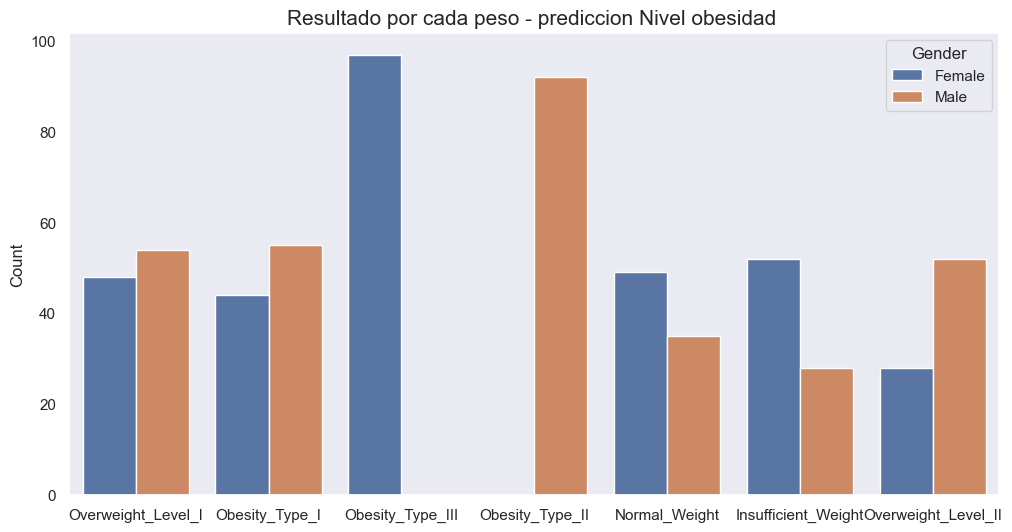

In [60]:
sns.countplot(x='nivel_obesidad',data=result, order = result.nivel_obesidad.value_counts().index , hue="Gender")
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Resultado por cada peso - prediccion Nivel obesidad ',fontsize=15)
plt.show()

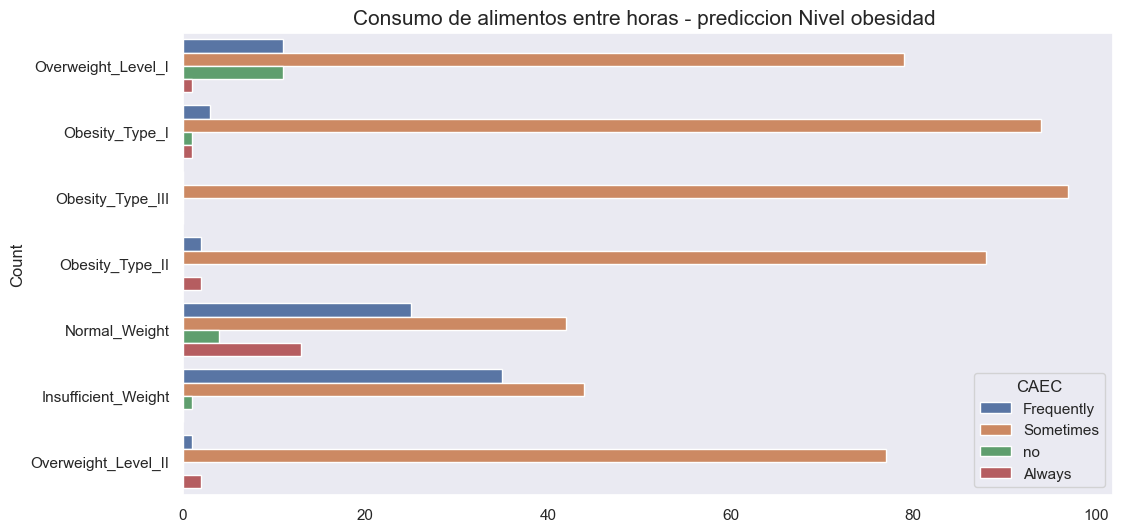

In [61]:

sns.countplot(y='nivel_obesidad',data=result, order = result.nivel_obesidad.value_counts().index  ,  hue="CAEC" )
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Consumo de alimentos entre horas - prediccion Nivel obesidad ',fontsize=15)
plt.show()


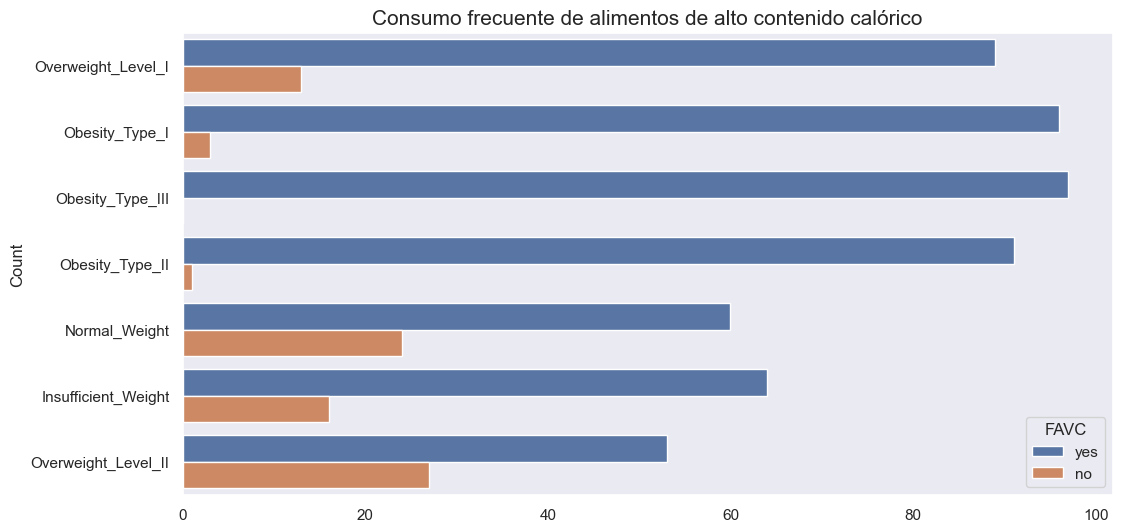

In [62]:


sns.countplot(y='nivel_obesidad',data=result, order = result.nivel_obesidad.value_counts().index  ,  hue="FAVC" )
plt.xlabel(None)
plt.ylabel('Count',fontsize=12)
plt.title('Consumo frecuente de alimentos de alto contenido calórico',fontsize=15)
plt.show()